<a href="https://colab.research.google.com/github/jayasankha1010/Machine_learning_with_python/blob/master/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

In [2]:
#download data set

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-06-08 17:18:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.09s   

2020-06-08 17:18:04 (797 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
#read csv file in to a pandas dataframe

df = pd.read_csv('FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
#trim df

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
3cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


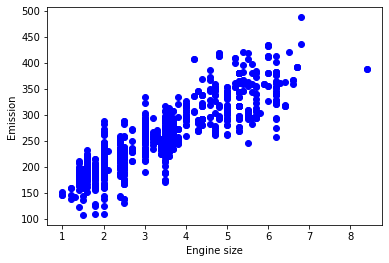

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [0]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [14]:
#preprocessing
#get features on any degree

#from sklearn.preprocessing import polynomial features
##from sklearn.preprocessing import PolynomialFeatures

from sklearn import preprocessing as pp
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = pp.PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)

train_x_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [21]:
clf = linear_model.LinearRegression()

clf.fit(train_x_poly, train_y)

print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         24.37777849  5.0575708  -0.51202892]]
Intercept:  [138.36716795]


Text(0, 0.5, 'Emission')

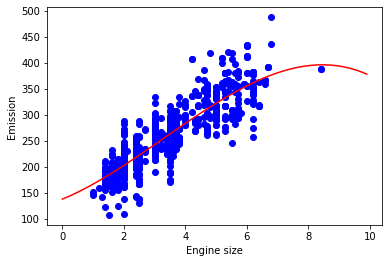

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue') #plot data 
xx =np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] +clf.coef_[0][1]*xx +clf.coef_[0][2]*np.power(xx,2) +clf.coef_[0][3]*np.power(xx,3)

plt.plot(xx,yy, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [23]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


Mean absolute error: 22.76
Residual sum of squares (MSE): 866.46
R2-score: 0.71
